In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [202]:
q = 3
betaJ = [0.14, 0.28, 0.56, 1.15]

In [203]:
def E(spins):
    s = 0

    for i in range(1, len(spins)):
        s = s+ spins[i-1]*spins[i]
    E = -s
    return E

In [204]:
def dE(s0,s1, s2):
    return 2*s1*(s0+s2)

In [205]:
def simulationStep(s, N, betaJ):
    rand = random.randint(0, N)#creates a random nuber with unifrom distribution
    if rand ==0:
        s1 = s[rand]
        s0 = s[N-1]
        s2 = s[rand+1]
    if rand == N-1:
        s1 = s[rand]
        s0 = s[rand-1]
        s2 = s[0]
    else:
        s0 = s[rand-1]
        s1 = s[rand]
        s2 = s[rand+1]
    if dE(s0, s1, s2) <0:
        s[rand]= -s[rand]
        return s
    elif dE(s0, s1, s2) == 0:
        P = random.random()
        if P< 0.5:
            s[rand]= -s[rand]
            return s
        else:
            return s
    else: 
        P = random.random()
        if P < exp(-betaJ*dE(s0, s1, s2)):
            s[rand] = -s[rand]
            return s
        else:
            return s
        

In [206]:

N = 100

s = (random.randint(0, 2, (N,))-1/2)*2

In [207]:
t = 1000
a = []
snew = s
for i in range(N*t):
    s = snew
    a.append(sum(s)/N)
    snew = simulationStep(s, N , betaJ[q])
    

In [208]:
E(snew)

-79.0

In [191]:
average(a)

-0.024279999999999996

In [192]:
b = [0.0035, -0.00649,0.00288, 0.0081, 0.00566]

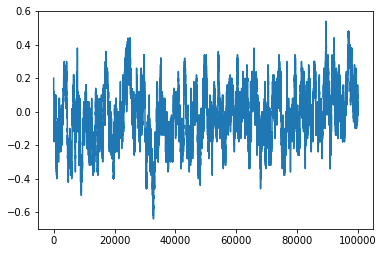

In [193]:
plot(a)

In [194]:
sqrt(average(multiply(a,a)))

0.1654579584063577

In [195]:
average(multiply(a,a))-average(a)**2

0.026786817600000002

In [196]:
print(a[-1])

-0.02


In [197]:
b = [0.3328,0.2840, 0.32139, 0.3359]
c = [0.1089,0.06454, 0.10169, 0.11115, 0.06074]
d = [0.1,0.4, -0.04, 0.34]

In [198]:
average(b)

0.31852250000000004

In [199]:
var(b)

0.00042646251875000016

Text(0,0.5,'m szórásának átlaga')

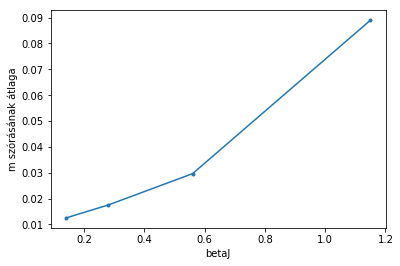

In [200]:
q = [0.0125, 0.0175, 0.02964, 0.089]
plot(betaJ, q, marker = '.')
xlabel('betaJ')
ylabel( 'm szórásának átlaga')

In [170]:
#a1 = a

In [183]:
#a2 = a

In [201]:
#a3 = a

In [209]:
a4 = a

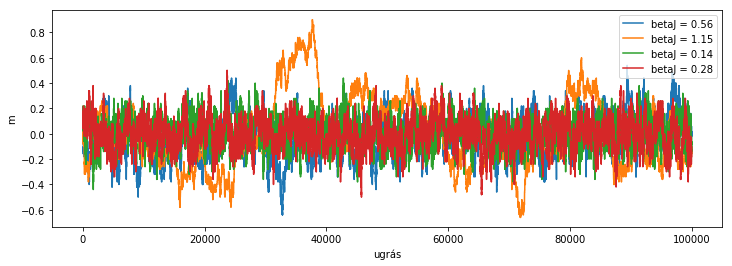

In [218]:
figsize(12, 4)

plot(a3, label = 'betaJ = 0.56')
plot(a4, label = 'betaJ = 1.15')
plot(a1, label='betaJ = 0.14')
plot(a2, label = 'betaJ = 0.28')
xlabel('ugrás')
ylabel('m')
legend(loc = 'upper right')